In [1]:
from neuron import h, gui
from neuron.units import ms, mV
import Cell
import ConnectionMapGen as cmg
import spikedelayer as sd
import Network

h.load_file("stdrun.hoc")
import numpy as np
from numpy.random import default_rng
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
w = Cell.PointCell.stim_w
print(w)
network_connmat = cmg.MultilevelMapGen(16, deterministic_weight=w, node_level_num = [10, 5, 1], interlevel_conn_prob = 0.8)

def multilevelPositionGen(node_level_num, spacer = 20):
    position = []
    for xidx in range(len(node_level_num)):
        for yidx in range(node_level_num[xidx]):
            position.append({"x": 2*spacer*xidx ,"y": spacer*yidx ,"z": 0, "theta": 0})
    return position

position  = multilevelPositionGen([10, 5, 1])

sample_network = Network.Network(connection_mat = network_connmat, cell_type = Cell.PointCell,
                                position_info = position)

shape_window = h.PlotShape(True)
shape_window.show(0)

0.00016

|-|       Pointcell[0].soma(0-1)
|-|       Pointcell[1].soma(0-1)
|-|       Pointcell[2].soma(0-1)
|-|       Pointcell[3].soma(0-1)
|-|       Pointcell[4].soma(0-1)
|-|       Pointcell[5].soma(0-1)
|-|       Pointcell[6].soma(0-1)
|-|       Pointcell[7].soma(0-1)
|-|       Pointcell[8].soma(0-1)
|-|       Pointcell[9].soma(0-1)
|-|       Pointcell[10].soma(0-1)
|-|       Pointcell[11].soma(0-1)
|-|       Pointcell[12].soma(0-1)
|-|       Pointcell[13].soma(0-1)
|-|       Pointcell[14].soma(0-1)
|-|       Pointcell[15].soma(0-1)



1.0

In [3]:
network_connmat

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.00016, 0.00016, 0.00016,
        0.00016, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.00016, 0.     , 0.00016,
        0.00016, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.00016, 0.00016, 0.     ,
        0.00016, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.00016, 0.00016, 0.     ,
        0.00016, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.     , 0.00016, 0.00016,
        0.00016, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.00016, 0.00016, 0.00016, 0.00016,
        0.000

In [3]:
#2-layer nn,  0-9 first layer, 10 - 14 second layer, 15 third
w = Cell.PointCell.stim_w

network_connmat = np.array([ 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, w, w, w, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, 0, 0, w, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, w, 0, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, w, w ,w, 0,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, w, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, 0, w, 0, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, w, w, 0, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, w, w, w,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   w, w, 0, 0, 0,   0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, w, w, 0,   0],
    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   w],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   w],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   w],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   w],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   w],
    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0,   0]
                        ])

spacer = 20
position = [{"x": 0*spacer, "y": 1*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 2*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 3*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 4*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 5*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 6*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 7*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 8*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 9*spacer, "z": 0, "theta": 0},
            {"x": 0*spacer, "y": 10*spacer, "z": 0, "theta": 0},
            
            {"x": 2*spacer, "y": 1*spacer, "z": 0, "theta": 0},
            {"x": 2*spacer, "y": 2*spacer, "z": 0, "theta": 0},
            {"x": 2*spacer, "y": 3*spacer, "z": 0, "theta": 0},
            {"x": 2*spacer, "y": 4*spacer, "z": 0, "theta": 0},
            {"x": 2*spacer, "y": 5*spacer, "z": 0, "theta": 0},
            
            {"x": 4*spacer, "y": 1*spacer, "z": 0, "theta": 0}
           ]


sample_network = Network.Network(connection_mat = network_connmat, cell_type = Cell.PointCell,
                                position_info = position, syn_mean_delay = 10, syn_std_delay = 10)



|-|       Pointcell[0].soma(0-1)
|-|       Pointcell[1].soma(0-1)
|-|       Pointcell[2].soma(0-1)
|-|       Pointcell[3].soma(0-1)
|-|       Pointcell[4].soma(0-1)
|-|       Pointcell[5].soma(0-1)
|-|       Pointcell[6].soma(0-1)
|-|       Pointcell[7].soma(0-1)
|-|       Pointcell[8].soma(0-1)
|-|       Pointcell[9].soma(0-1)
|-|       Pointcell[10].soma(0-1)
|-|       Pointcell[11].soma(0-1)
|-|       Pointcell[12].soma(0-1)
|-|       Pointcell[13].soma(0-1)
|-|       Pointcell[14].soma(0-1)
|-|       Pointcell[15].soma(0-1)



In [4]:

rng = default_rng()
def poisson_process(start: float, max_t: float, avg_interval: float) -> list:
    t = start
    events = []
    while t < max_t:
        t += rng.exponential(avg_interval)
        events.append(t)
    # discard the last event, as it exceeds max_t
    if events:
        events = events[:-1]
    return events

total_time = 400 * ms
settle_time = 20 * ms
avg_intv = 5 * ms

stimlations = []
for i in range(10):
    stimlations.append(poisson_process(settle_time, total_time, avg_intv))
for j in range(10):
    sample_network.cells[j].add_custom_stimulus(stimlations[j])
    

In [5]:
shape_window = h.PlotShape(True)
shape_window.show(0)

t = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(total_time)



0.0

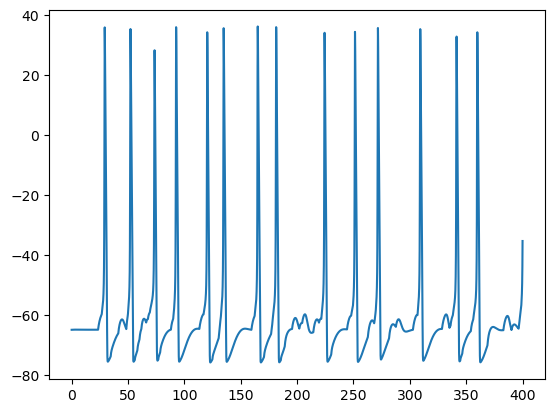

In [6]:

plt.plot(t, sample_network.cells[0].soma_v)
plt.show()


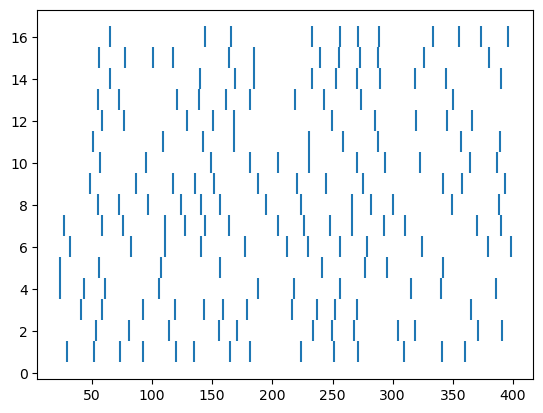

In [7]:
plt.figure()
for i, cell in enumerate(sample_network.cells):
    # print(i, cell.spike_times)
    if len(cell.spike_times) > 0:
        plt.vlines(cell.spike_times, i + 0.5, i + 1.5)
plt.show()